importing Python libraries

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagramdata.csv")
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [17]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

there isn't null value

In [36]:
data = data.dropna()

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\compu_tech\AppData\Local\Temp\ipykernel_13816\4127021947.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




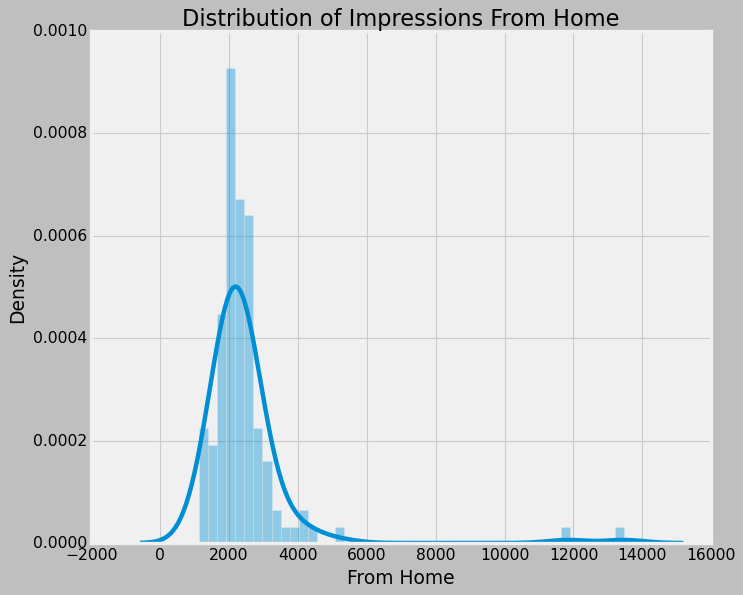

In [38]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impressions I get from the home section on Instagram shows how much posts reach followers. Looking at the impressions from home, I can say it’s hard to reach all followers daily.

C:\Users\compu_tech\AppData\Local\Temp\ipykernel_13816\671336047.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




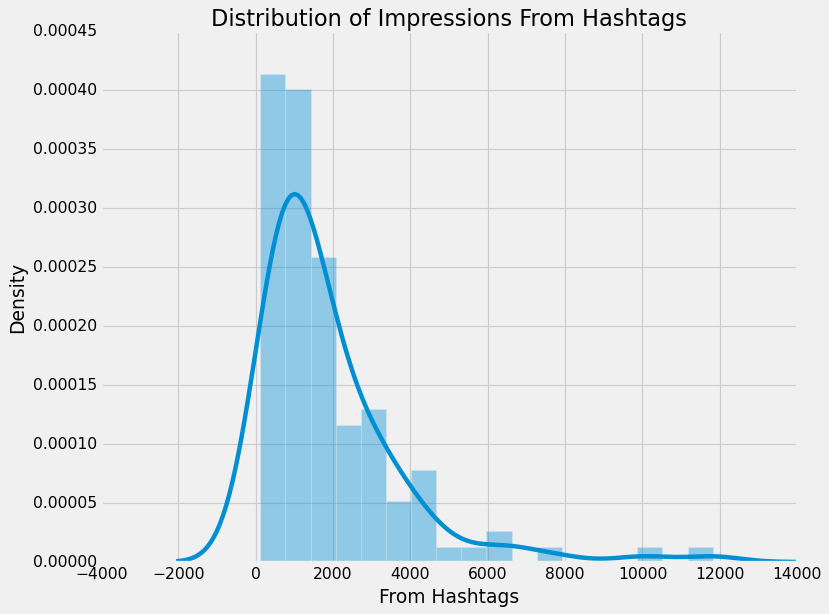

In [39]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

C:\Users\compu_tech\AppData\Local\Temp\ipykernel_13816\2610232579.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




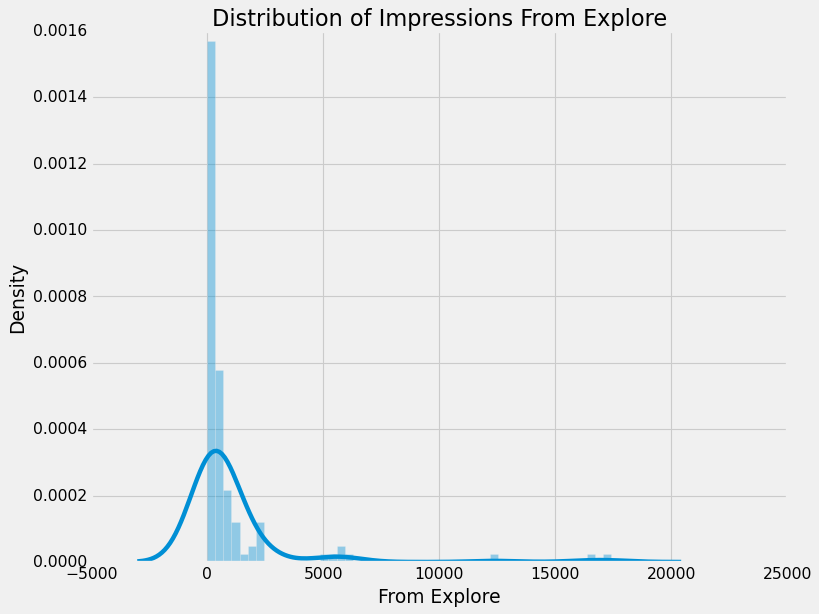

In [40]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions you have received from the explore section, I can say that Instagram does not recommend your posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach you receive from hashtags.

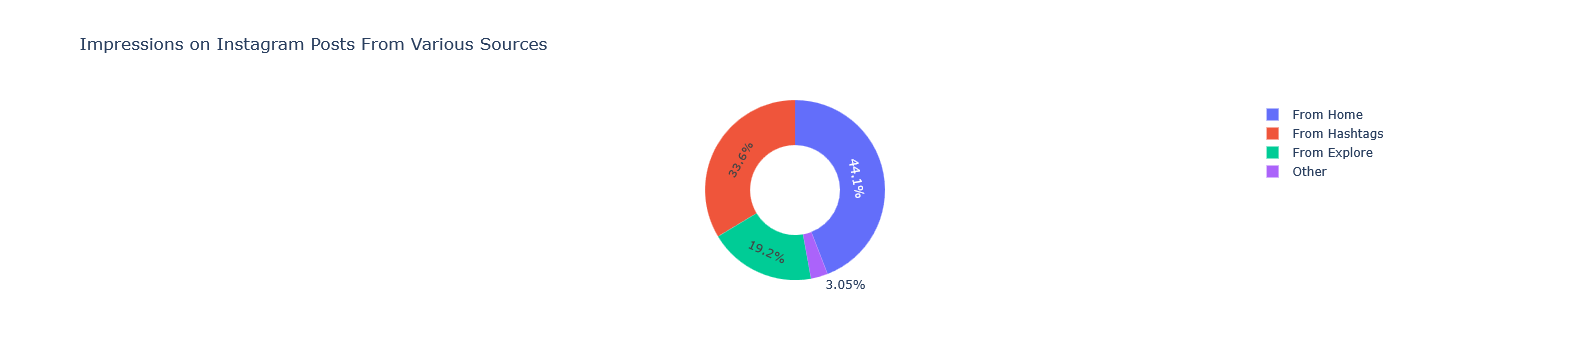

In [41]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

from the Donut Plot:
Follower Reach Dominates: The largest portion (44.1%) of your Instagram post impressions comes from your followers ("From Home"). This indicates a strong existing audience base and good engagement with your current content.

Hashtags are a Significant Driver:  Hashtags contribute a substantial 33.6% of your reach. This highlights the effectiveness of your hashtag strategy in exposing your content to a wider audience beyond your immediate followers.

Explore Section Provides Moderate Reach: The "Explore" section accounts for 19.2% of impressions. This suggests that your content is being discovered by users who don't already follow you, indicating potential for growth and attracting new followers.

Other Sources Play a Minor Role:  The "Other" category contributes only 3.05% of impressions. This could encompass various sources (e.g., shares, mentions, saved posts), but their overall impact is relatively small compared to followers, hashtags, and Explore.

Analyzing Content

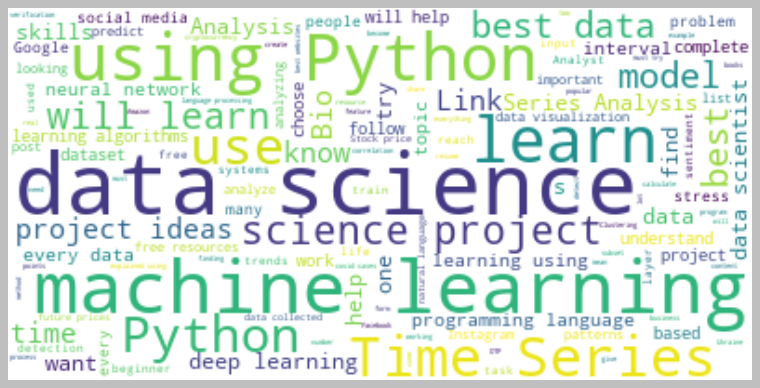

In [42]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

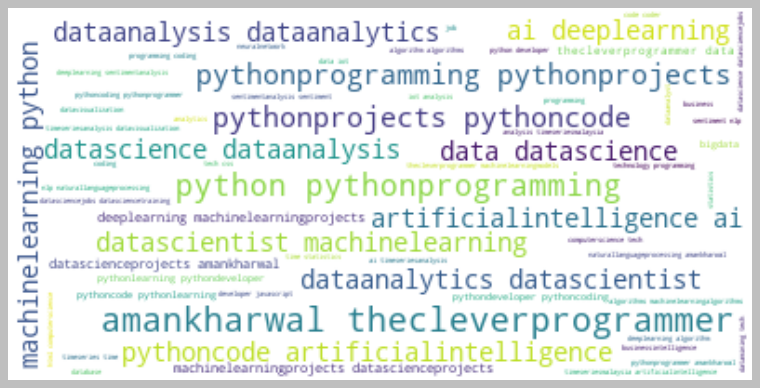

In [43]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Analyzing Relationships

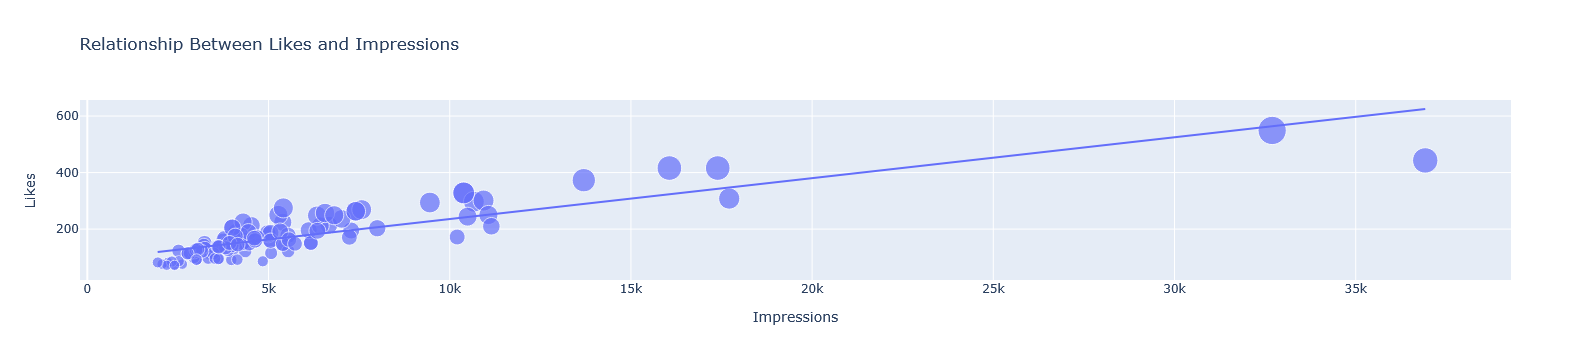

In [44]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach you got on Instagram.
This means that the more your Instagram post reaches people, the more likes you are likely to get. This is a direct (positive) relationship. In other words, posts that are seen by a larger number of people have a greater chance of getting likes.

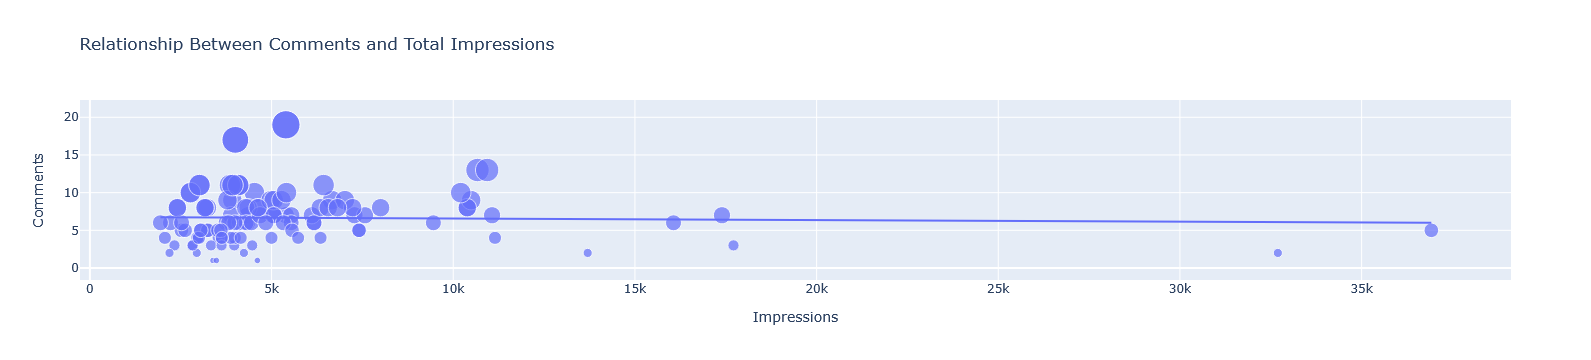

In [45]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

The trendline is almost flat, suggesting that even if your content reaches a large audience (high impressions), it doesn't necessarily translate into a significant increase in comments.

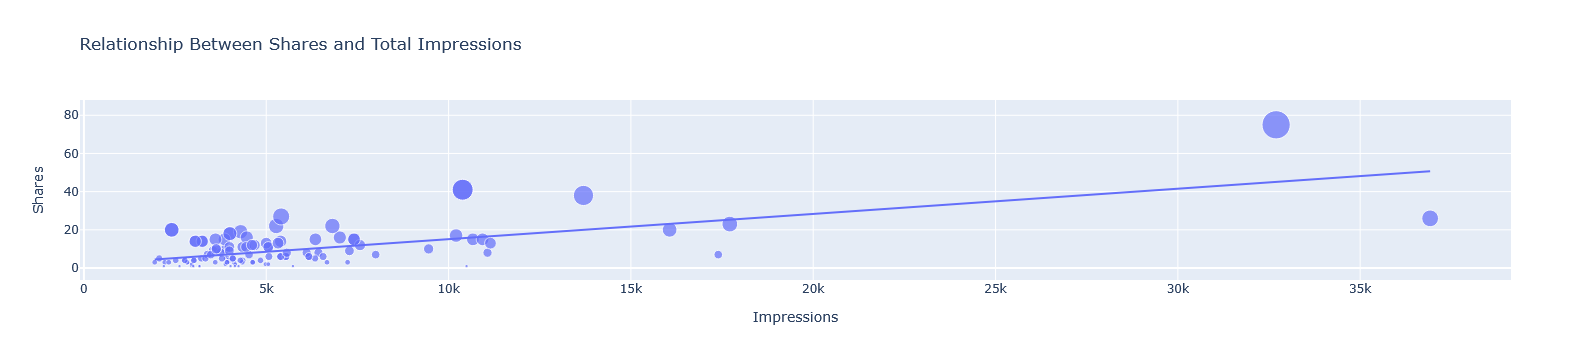

In [46]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

The upward trendline indicates that as your content reaches more people, the number of shares tends to increase. This suggests that reach is a more important driver for shares than it is for comments.
Content Resonance: Shares often indicate that the content resonated strongly with viewers. They found it valuable, entertaining, or relevant enough to pass on to their own network.

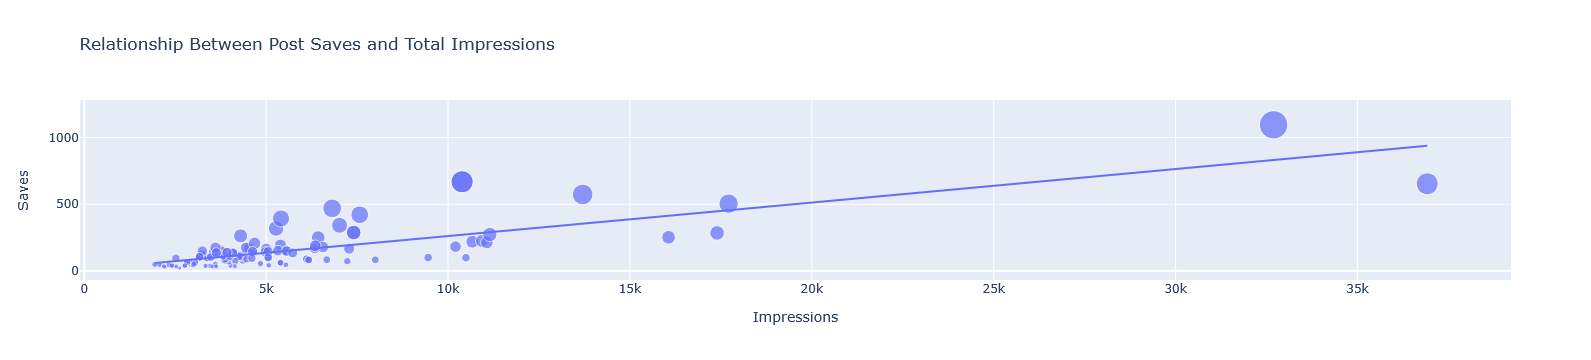

In [47]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

Strong Positive Relationship: The upward-sloping trendline indicates a strong positive relationship between impressions and saves. As your posts reach a wider audience, the number of saves tends to increase.
Value-Driven Content: Saves are a strong signal that your audience finds your content valuable, informative, or inspiring enough to save for later reference. This suggests that your content is resonating with your target audience and providing them with a reason to engage further.
Reach Amplifies Value Recognition: The fact that saves increase with impressions reinforces the idea that broader reach allows more people to discover and appreciate the value your content provides.

In [48]:
numeric_data = data.select_dtypes(include=[np.number])

correlation = numeric_data.corr()

print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


Strong Positive Correlations with Impressions:

From Explore: There's a very high positive correlation (0.89) between impressions and reach from the Explore page. This suggests that the Explore page is a significant driver of overall impressions.
Follows: A strong positive correlation (0.88) exists between impressions and new followers. This means that posts with higher impressions tend to attract more followers.
Likes: There's a strong positive correlation (0.84) between impressions and likes. This indicates that posts with higher impressions tend to receive more likes.
Moderate Positive Correlations with Impressions:

Saves: There's a moderate positive correlation (0.77) between impressions and saves. This means that posts with higher impressions tend to be saved more often.
Profile Visits: A moderate positive correlation (0.76) exists between impressions and profile visits. This indicates that posts with higher impressions tend to drive more profile visits.
Shares: There's a moderate positive correlation (0.63) between impressions and shares. This suggests that posts with higher impressions tend to be shared more often.
From Other: A moderate positive correlation (0.59) exists between impressions and reach from other sources.
From Hashtags: There's a moderate positive correlation (0.56) between impressions and reach from hashtags.
Weak Negative Correlation with Impressions:

Comments: There's a weak negative correlation (-0.02) between impressions and comments. This suggests that there might not be a strong relationship between these two metrics.

In [49]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


The conversion rate of 41% indicates that a significant portion of profile visits result in follows. This suggests that your profile is effective in converting visitors into followers.

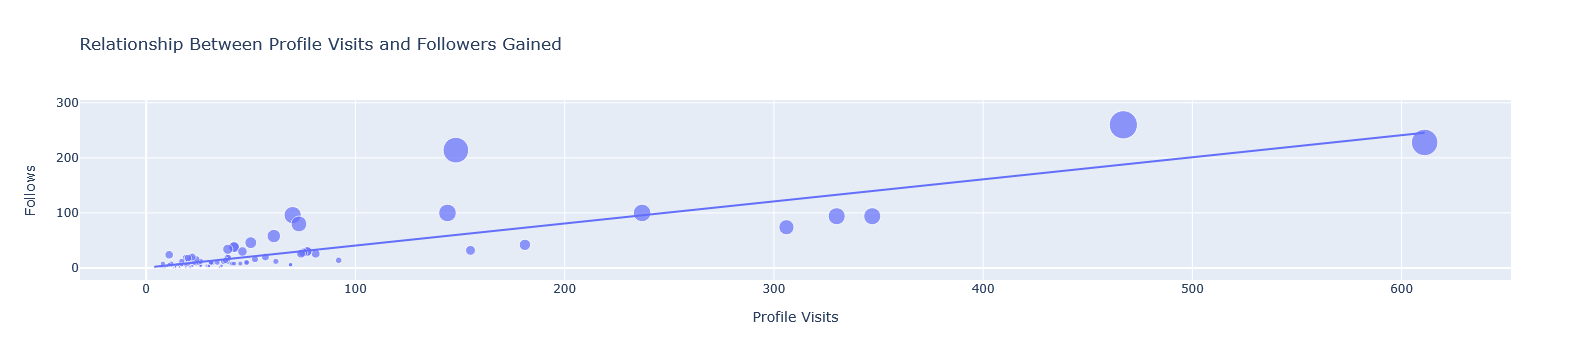

In [50]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [51]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [52]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8570063875129788

Regression Analysis: The provided code performs a regression analysis to predict the number of impressions based on other features such as likes, saves, comments, shares, profile visits, and followers. The model achieves a score of 0.857, indicating a good fit.

In [53]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9617.59074749])

Prediction: The code predicts that a post with 282 likes, 233 saves, 4 comments, 9 shares, 165 profile visits, and 54 followers will receive approximately 9617 impressions.